Ejercicio 1
en ipynb Recorta el punto de interés de la imagen1.jpg tal cual se muestra en la figura, guarda la imagen recortada en tu disco local, y muestra la imagen original y la recortada con axis (imagen a colores)

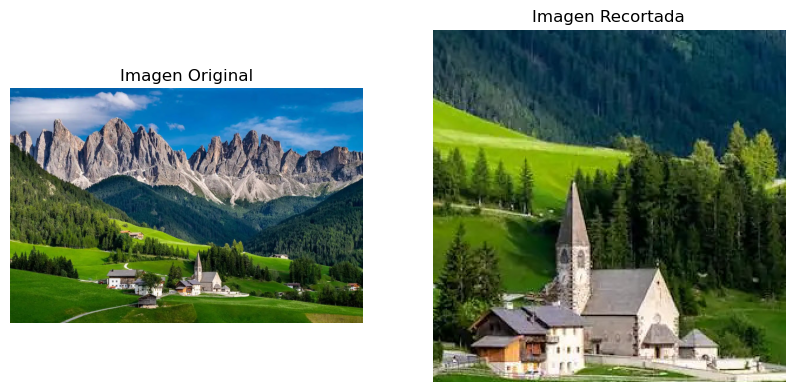

Imagen recortada guardada en: imagen_recortada.jpg


In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image_path = "imagen1.jpg"  
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


x, y, w, h = 600, 500, 300, 300  
cropped_image = image[y:y+h, x:x+w]  

cropped_image_path = "imagen_recortada.jpg"
cv2.imwrite(cropped_image_path, cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR))


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(image)
axes[0].set_title("Imagen Original")
axes[0].axis("off")

axes[1].imshow(cropped_image)
axes[1].set_title("Imagen Recortada")
axes[1].axis("off")

plt.show()

print(f"Imagen recortada guardada en: {cropped_image_path}")

Ejercicio 2.
Genera un degradado lineal a colores.

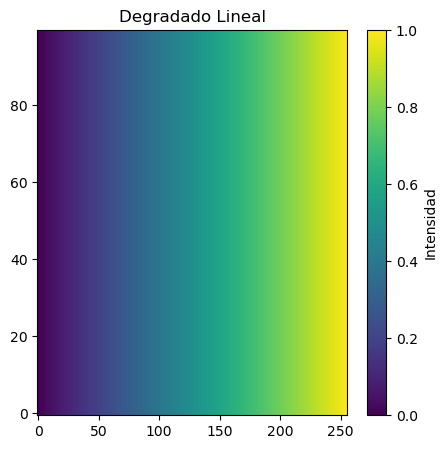

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)
y = np.linspace(0, 1, 256)
Y, X = np.meshgrid(y, x)
Z = Y  

plt.figure(figsize=(5, 5))
plt.imshow(Z, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Intensidad')
plt.title("Degradado Lineal")
plt.show()

Ejercicio 3.
Genera una imagen semejante a un tablero de ajedrez tomando en cuenta que cada casilla debe medir 100x100 px

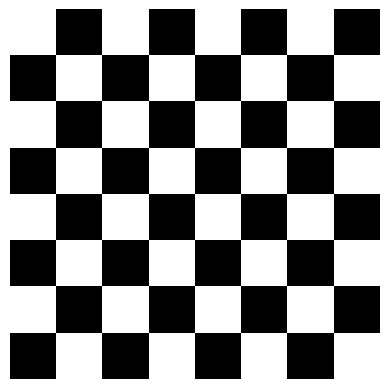

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rows, cols = 8, 8
square_size = 100 
board = np.zeros((rows * square_size, cols * square_size))
for i in range(rows):
    for j in range(cols):
        if (i + j) % 2 == 0:
            board[i * square_size:(i + 1) * square_size, 
                  j * square_size:(j + 1) * square_size] = 1

plt.imshow(board, cmap="gray", interpolation="nearest")
plt.axis("off")  
plt.show()


Ejercicio 4.
Tomando en cuenta el ejercicio 2 aplica la ecualización del histograma y muestra el mismo viendo las diferencias entre imágenes e histogramas.

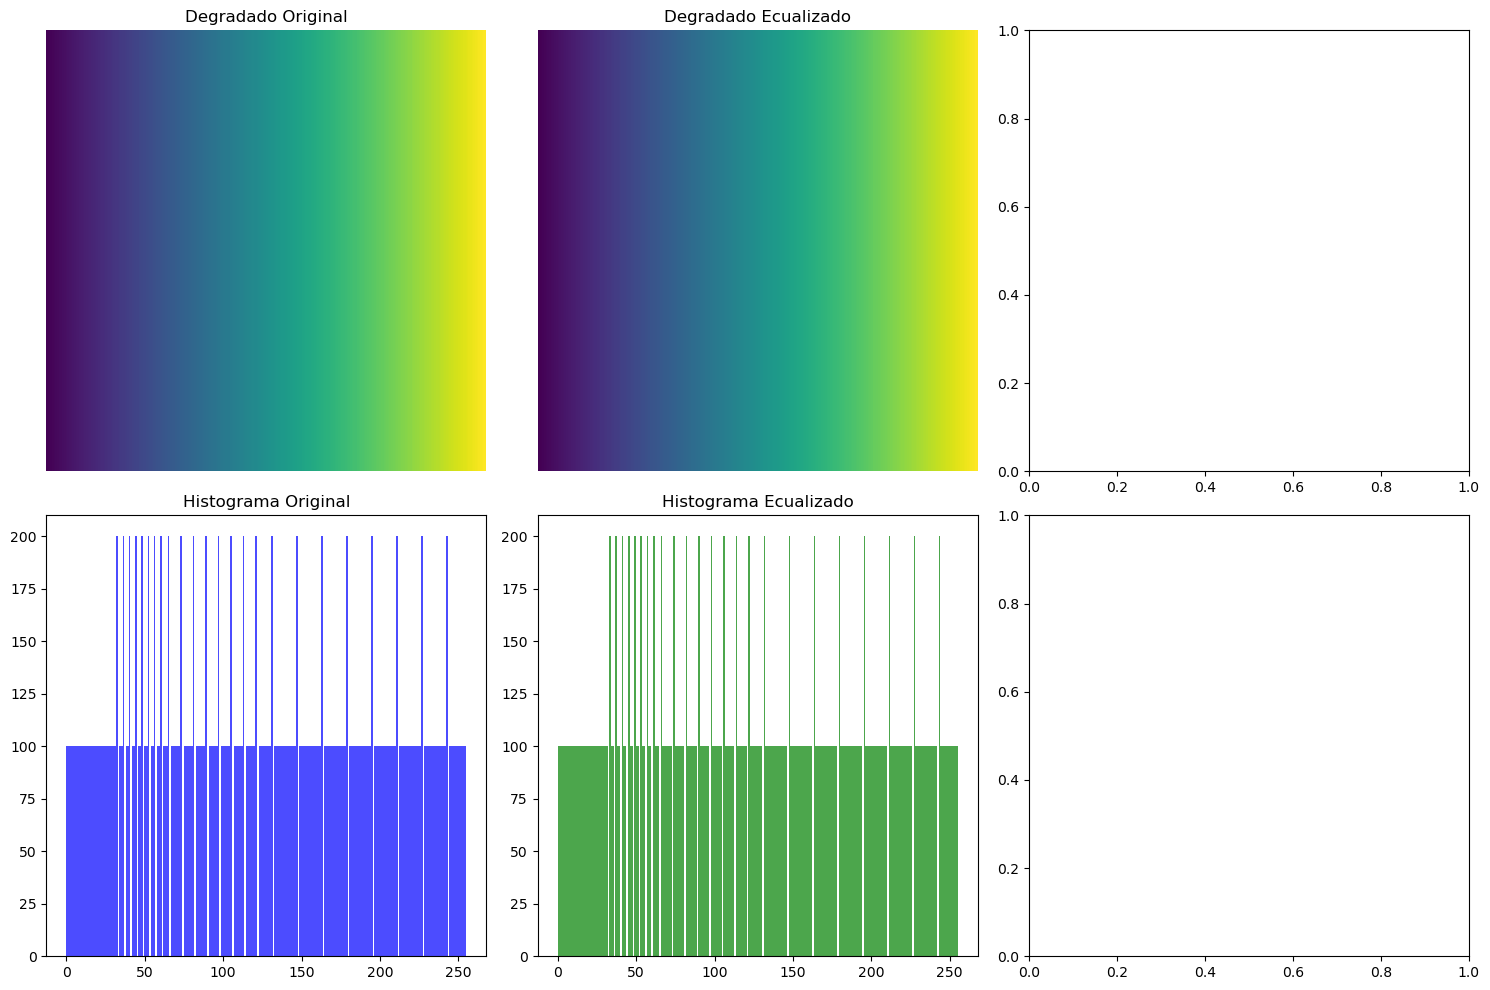

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2  


x = np.linspace(0, 2, 100)
y = np.linspace(0, 1, 256)
Y, X = np.meshgrid(y, x)
Z = Y  

gradient = (Z * 255).astype(np.uint8)

equalized_gradient = cv2.equalizeHist(gradient)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(gradient, aspect='auto', cmap='viridis', origin='lower')
axes[0, 0].set_title("Degradado Original")
axes[0, 0].axis("off")

axes[0, 1].imshow(equalized_gradient, aspect='auto', cmap='viridis', origin='lower')
axes[0, 1].set_title("Degradado Ecualizado")
axes[0, 1].axis("off")

axes[1, 0].hist(gradient.ravel(), bins=256, color="blue", alpha=0.7)
axes[1, 0].set_title("Histograma Original")

axes[1, 1].hist(equalized_gradient.ravel(), bins=256, color="green", alpha=0.7)
axes[1, 1].set_title("Histograma Ecualizado")

plt.tight_layout()
plt.show()



Ejercicio 5.
Tomando en cuenta la imagen1.jpg aplica un degradado lineal en ella.

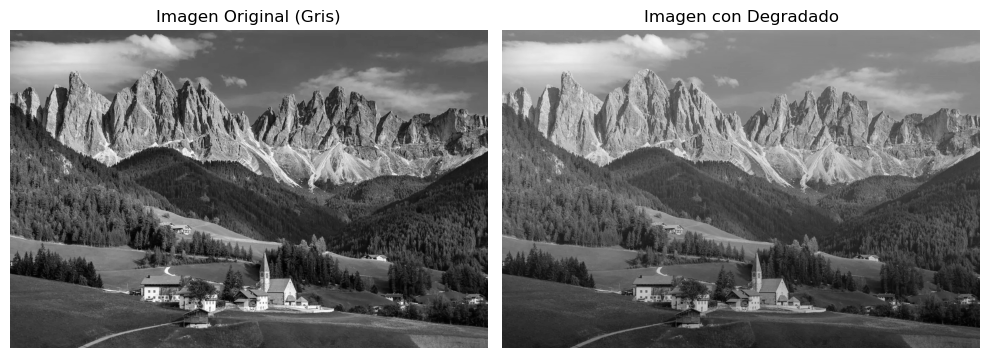

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


imagen = cv2.imread("imagen1.jpg")

imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)


altura, ancho = imagen_gris.shape
degradado = np.linspace(1, 0, altura)  
degradado = np.tile(degradado, (ancho, 1)).T  


imagen_con_degradado = cv2.addWeighted(
    imagen_gris.astype(np.float32), 0.7, (degradado * 255).astype(np.float32), 0.3, 0
).astype(np.uint8)

cv2.imwrite("imagen_original_gris.jpg", imagen_gris)
cv2.imwrite("imagen_con_degradado.jpg", imagen_con_degradado)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap="gray")
plt.axis("off")
plt.title("Imagen Original (Gris)")


plt.subplot(1, 2, 2)
plt.imshow(imagen_con_degradado, cmap="gray")
plt.axis("off")
plt.title("Imagen con Degradado")

plt.tight_layout()
plt.show()


